Accuracy: 0.9105
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        64
           1       0.95      0.90      0.93        62
           2       0.96      0.82      0.88        56
           3       0.98      0.96      0.97        51
           4       0.95      1.00      0.97        54
           5       0.95      0.95      0.95        55
           6       0.81      1.00      0.89        50
           7       0.70      0.58      0.64        60
           8       0.92      0.98      0.95        56
           9       0.95      1.00      0.97        54
          10       1.00      0.86      0.92        63
          11       0.96      0.76      0.85        63
          12       0.61      1.00      0.76        42
          13       0.96      1.00      0.98        48
          14       0.84      0.91      0.87        64
          15       0.94      0.97      0.96        66
          16       1.00      0.67      0

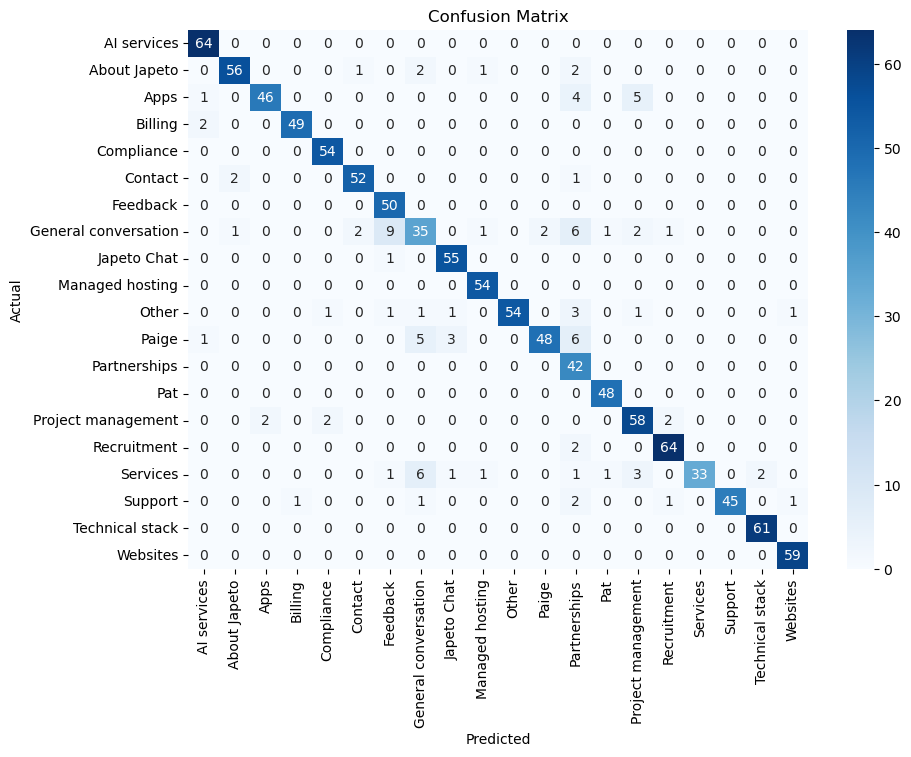

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Load the dataset
file_path = "chatbot_dataset.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name='Result 1')



label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['categories'])

vectorizer = TfidfVectorizer(max_features=5000, stop_words="english", ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(df["user_message"])

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_tfidf, df['category_encoded'])

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#model Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Error Matrix plot
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Train size: 4512, Test size: 1128
Number of classes: 20

Accuracy: 0.9016

Classification Report:
                      precision    recall  f1-score   support

         AI services       0.91      1.00      0.96        64
        About Japeto       0.93      0.92      0.93        62
                Apps       0.96      0.84      0.90        56
             Billing       0.92      0.94      0.93        51
          Compliance       1.00      0.98      0.99        54
             Contact       0.88      0.91      0.89        55
            Feedback       0.81      1.00      0.89        50
General conversation       0.73      0.55      0.63        60
         Japeto Chat       0.98      0.96      0.97        56
     Managed hosting       0.93      1.00      0.96        54
               Other       0.96      0.78      0.86        63
               Paige       0.92      0.75      0.82        63
        Partnerships       0.66      1.00      0.79        42
                 Pat       0.92  

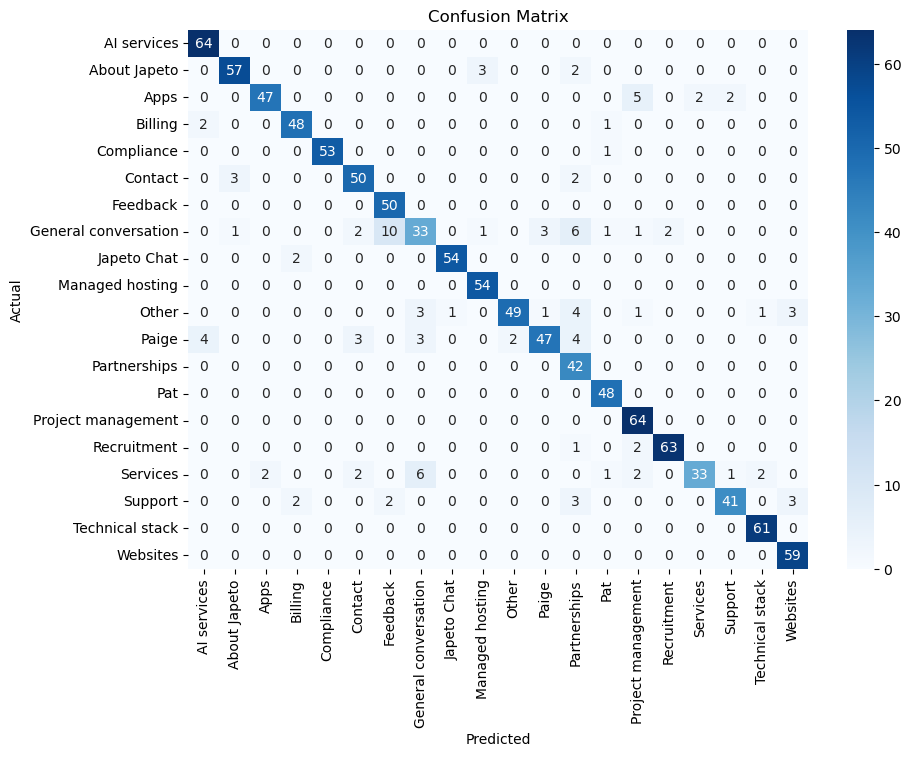

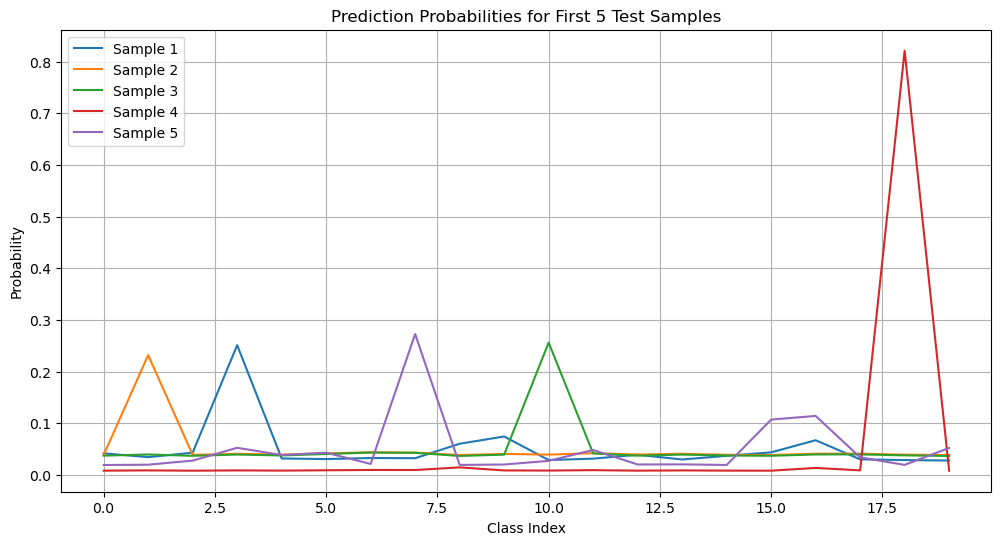

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

# Предобработка данных
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['categories'])

vectorizer = TfidfVectorizer(max_features=5000, stop_words="english", ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(df["user_message"])

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_tfidf, df['category_encoded'])

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")
print(f"Number of classes: {len(np.unique(y_train))}")

# Модель Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# Точность и отчёт
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Матрица неточностей
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Визуализация вероятностей предсказаний для первых 5 примеров
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.plot(y_proba[i], label=f"Sample {i+1}")
plt.title("Prediction Probabilities for First 5 Test Samples")
plt.xlabel("Class Index")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
import time

# Measure the time taken to predict all data
start_time = time.time()
y_pred = model.predict(X_test)
end_time = time.time()

# Display the execution time
print(f"Classification time for {len(X_test.toarray())} messages: {end_time - start_time:.4f} seconds")
print(f"Average time per message: {(end_time - start_time) / len(X_test.toarray()):.6f} seconds")


Classification time for 1128 messages: 0.0011 seconds
Average time per message: 0.000001 seconds
